In [2]:
import glacierml as gl
import matplotlib.pyplot as plt
import imageio
import numpy as np
from tqdm import tqdm

2023-08-11 15:41:02.880024: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-11 15:41:02.925717: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 15:41:03.503817: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
df = gl.parameterize_data('4')

In [6]:
df

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Thickness
0,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0
1,RGI60-01.00570,63.281000,-145.427000,14.0,1162,1858,2438,17.567,172,8639,147.0
2,RGI60-01.01104,58.380000,-134.349000,10.0,676,1123,1494,9.528,327,6332,66.0
8,RGI60-01.16374,61.200000,-140.302000,14.0,2145,2509,2894,5.859,341,3374,66.0
9,RGI60-02.03411,51.177000,-116.330000,15.3,2390,2526,2853,0.872,69,1181,70.0
...,...,...,...,...,...,...,...,...,...,...,...
489,RGI60-17.14088,-33.029600,-70.098400,29.0,2929,5121,5894,8.376,358,8560,59.0
490,RGI60-17.14647,-30.145400,-69.927600,29.3,4664,5187,5525,1.189,148,1596,28.0
491,RGI60-17.15038,-28.538700,-69.731800,16.0,4784,5234,5597,3.140,190,3349,39.0
492,RGI60-17.15087,-28.381400,-69.609100,11.6,5068,5406,5753,5.209,79,3782,67.0


(array([ 95., 164.,  54.,  10.,   5.,   6.,   3.,   1.,   2.,   1.]),
 array([  4.,  36.,  68., 100., 132., 164., 196., 228., 260., 292., 324.]),
 <BarContainer object of 10 artists>)

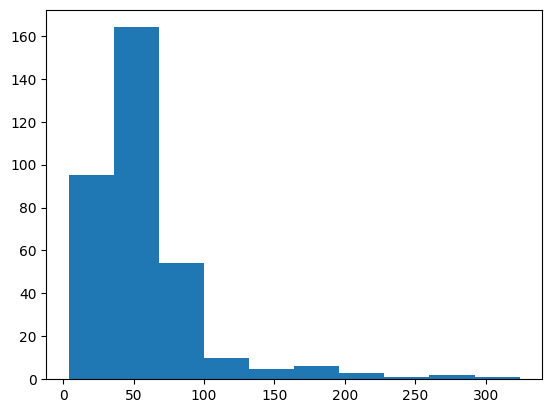

In [8]:
plt.hist(df['Thickness'])

  0%|          | 0/4 [00:00<?, ?it/s]

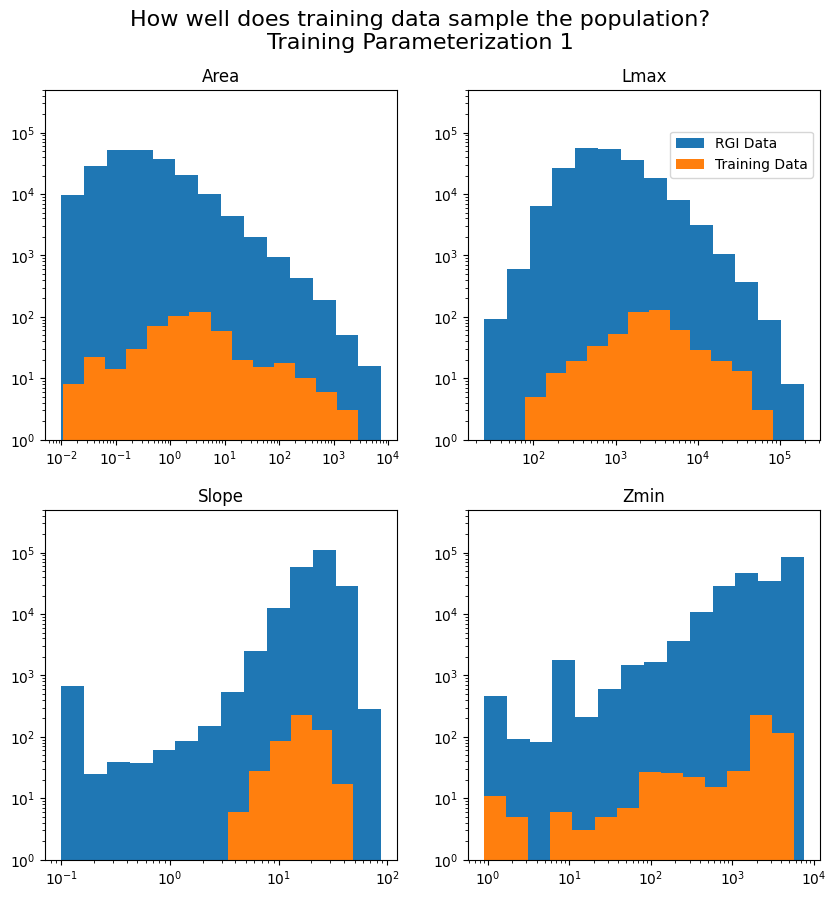

 25%|██▌       | 1/4 [00:07<00:22,  7.65s/it]

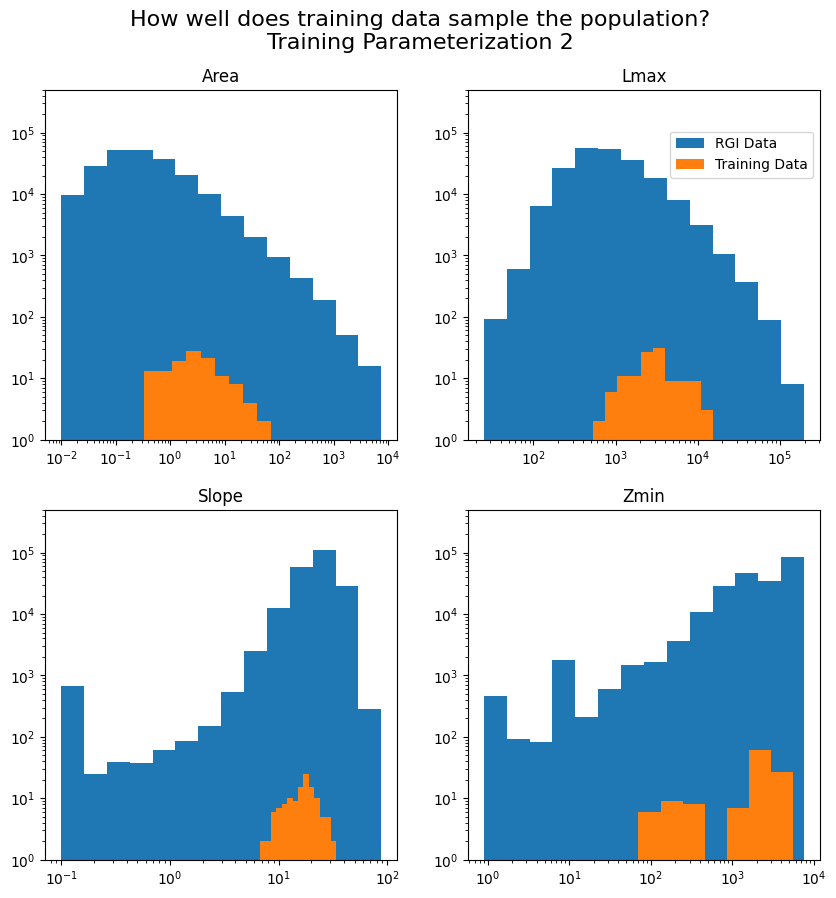

 50%|█████     | 2/4 [00:15<00:15,  7.73s/it]

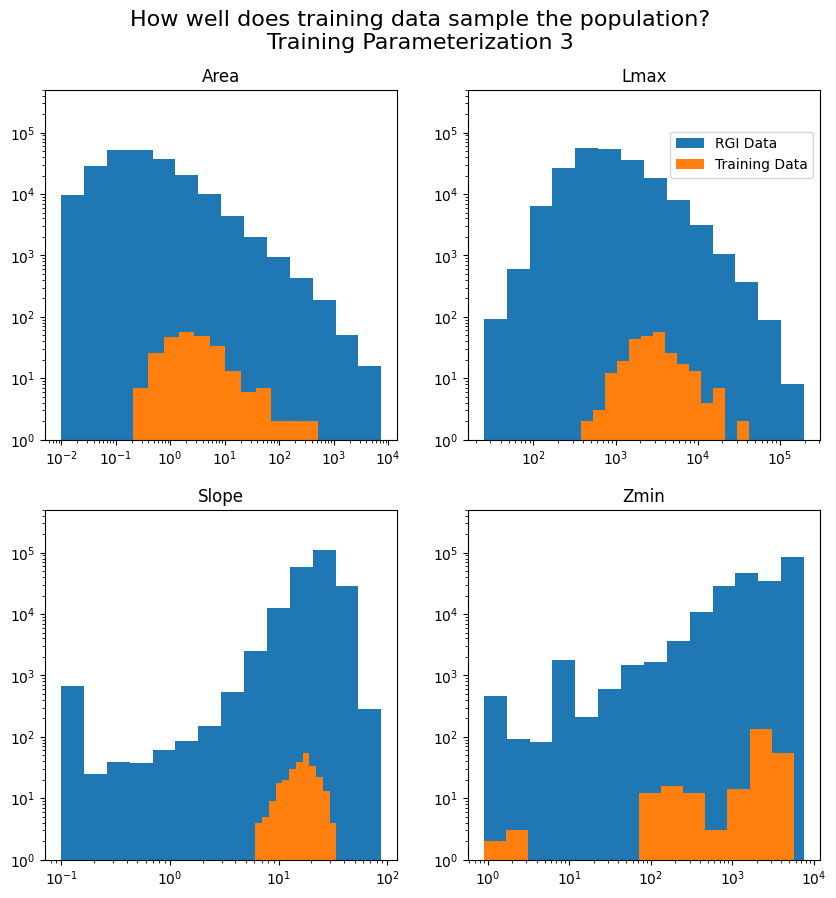

 75%|███████▌  | 3/4 [00:23<00:07,  7.77s/it]

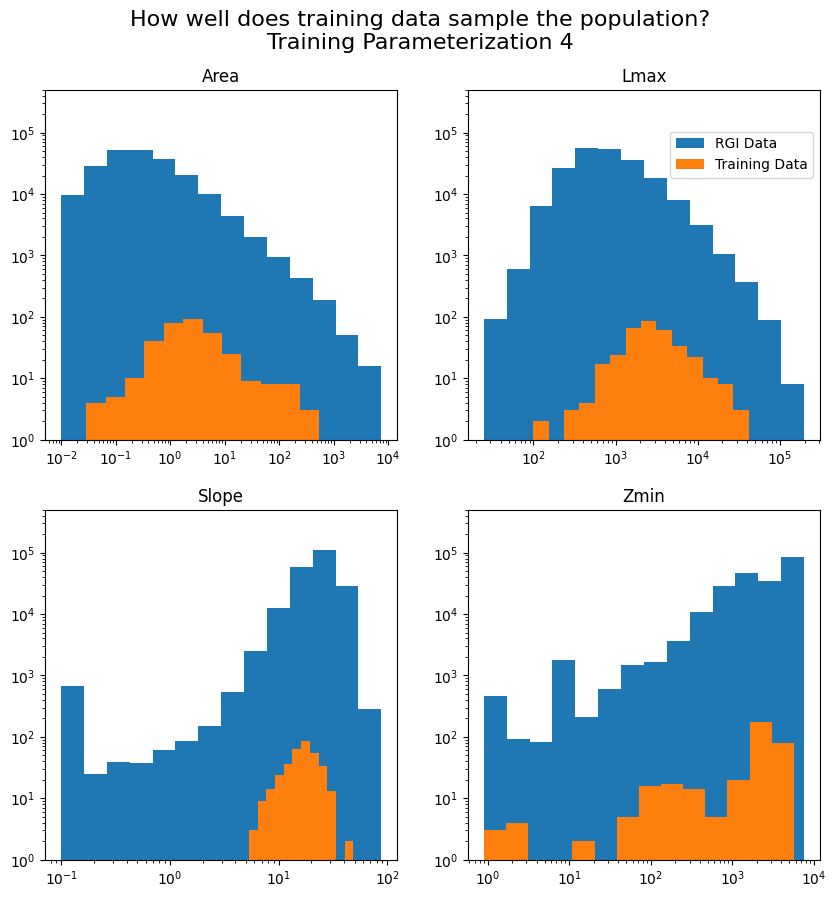

In [7]:
def make_frames():

    for j in tqdm(range(1,5,1),leave = False):
        p = str(j)

        df = gl.load_notebook_data(p,'first')

        train = gl.parameterize_data(p)

        feat_list = ['Area','Lmax','Slope','Zmin']
        fig = plt.figure(figsize = (10,10))
        for n,i in (enumerate(feat_list)):
            ax = plt.subplot(2,2,n+1)
            x = df[i]
    #         x = np.array(df[i])
    #         x[np.where(x==np.nan)] = 0
    #         print(x)
#             print(x.min())
            
    #         y = np.array(train[i])
            y = train[i]
            y[(y == -999)] = 0
            y[(y == -9)] = 25
#             print(y.min())
#             print('')
            if i == 'Slope':
    
                x = x + 0.1
                y = y + 0.1
            
            if i == 'Zmin':
                x = x + 0.9
                y = y + 0.9
    #         y = y[np.where(y>= 0)]
            plt.hist(
                x, 
                bins=np.logspace(np.log10(x.min()), np.log10(x.max()), 15), 
                log = True, label = 'RGI Data',
            )
            plt.hist(
                y, 
                bins=np.logspace(np.log10(y.min()), np.log10(y.max()), 15), 
                log = True, label = 'Training Data',
            )
            plt.ylim((1e0,500000))
            ax.set_title(i)
            plt.loglog()



        plt.suptitle(
             'How well does training data sample the population?\nTraining Parameterization ' +
            p, 
             fontsize = 16, y = .96
        )
        plt.legend(bbox_to_anchor=(0,0,1,2.1))

        save_title = 'pop_sample_' + p

#         plt.savefig(f'img/img_{save_title}.png', 
#             transparent = False,  
#             facecolor = 'white'
#            )
        plt.show()
    
make_frames()
#     plt.show()

        


# frames = []

# for k in range(1,5,1):
#     p = str(k)
#     save_title = 'pop_sample_' + p
#     image = imageio.v2.imread(f'img/img_{save_title}.png')
#     frames.append(image)
# imageio.mimsave('pop_sample_example.gif', # output gif
#             frames,          # array of input frames
#             duration = 3000,
#             loop = 10
#            )   